In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [61]:
cancer = pd.read_csv('data.csv')


In [49]:
def encode_Diagnosis(x):
  if x == "B":
    return 0
  elif x == "M":
    return 1
cancer["encode_Diagnosis"] = cancer.apply(lambda x: encode_Diagnosis(x["Diagnosis"]),axis=1)


In [56]:
y = cancer[['encode_Diagnosis']]
x = cancer.drop(columns=['Diagnosis','encode_Diagnosis','ID',], axis=1)

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=49)

In [59]:
#VarianceThreshold selection  
#selector = VarianceThreshold(threshold=0)
#selector.fit(x_train)
#selector.get_support()

In [29]:
tree = DecisionTreeClassifier()
tree_model = tree.fit(x_train,y_train)

In [30]:
predictions = tree_model.predict(x_test)
predictions
tree_model.score(x_test, y_test)

0.9473684210526315

In [31]:
print("DecisionTree Accuracy:",accuracy_score(y_test, predictions))
print("DecisionTree Precision:",precision_score(y_test, predictions))
print("DecisionTree Recall:",recall_score(y_test, predictions))
print("DecisionTree F1-score:",f1_score(y_test, predictions))


DecisionTree Accuracy: 0.9473684210526315
DecisionTree Precision: 0.9487179487179487
DecisionTree Recall: 0.9024390243902439
DecisionTree F1-score: 0.9249999999999999


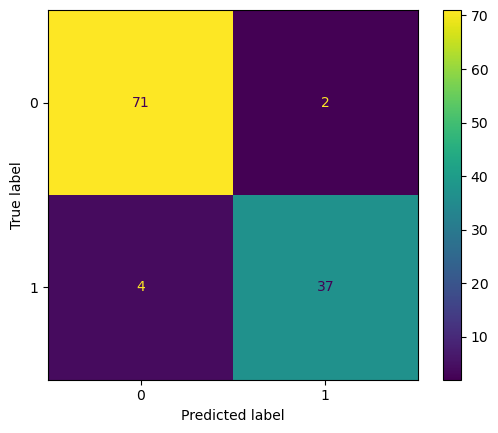

In [32]:

cm = confusion_matrix(y_test, predictions,labels=tree_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_model.classes_)
disp.plot()
plt.show()


In [36]:
 y_score = tree_model.predict_proba(x_test)[:,1]


In [37]:
false_positive_rate, true_positive_rate, threshold1 = roc_curve(y_test, y_score)
print('roc_auc_score  DecisionTree: ', roc_auc_score(y_test, y_score))

roc_auc_score  DecisionTree:  0.9375208820581357


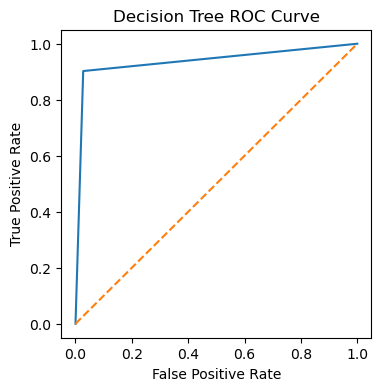

In [40]:
plt.subplots(1, figsize=(4,4))
plt.title('Decision Tree ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()